In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.regression import linear_model
#Importing packages

df = pd.read_csv('/Users/mychalortiz/Mosquito/mosquito_data_part_2.csv')
#Reading in csv file to dataframe

The dataset we are working with contains information about mosquito populations captured in different traps, including details about the trap type, location, species of mosquitoes, and whether or not the West Nile Virus (WNV) was present in the mosquito samples. The goal of this project is to a perform a set of analyses on the relationship between the different variables and the number of mosquitos caught, as well as the probability of finding West Nile Virus (WNV) at any particular time and location. We will be running a linear regression to determine how the independent variables affect the number of mosquitoes caught, and a logistic regression model to determine how the independent variables affect West Nile Virus presence.

***Data Prep and Exploration***

In [86]:
df.shape

(18495, 12)

- The dataframe has 18495 rows and 12 columns

In [87]:
df.head(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


- Using the 'head' function to take a look at the first few rows of the data
- We have general information such as the year, month, and week when the mosquito samples were collected, as well as the exact date, time, and location (lat and lon) of sample collection
- There is also data on the mosquitos and species, specifically the number of mosquitos caught, species name, and whether or not the West Nile Virus was present in the mosquito sample

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


- Using the 'info' function to look at the data types for each variable

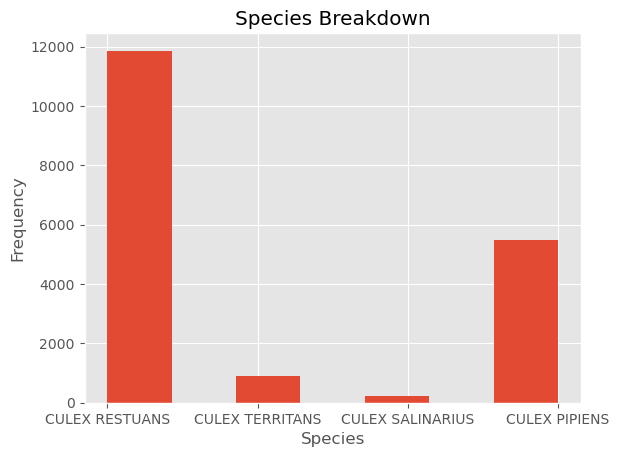

In [89]:
plt.figure()
plt.hist(df['Species'].values, bins=7)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Species Breakdown')
plt.show()

- Taking a look at a histogram to view the breakdown of 'Species'

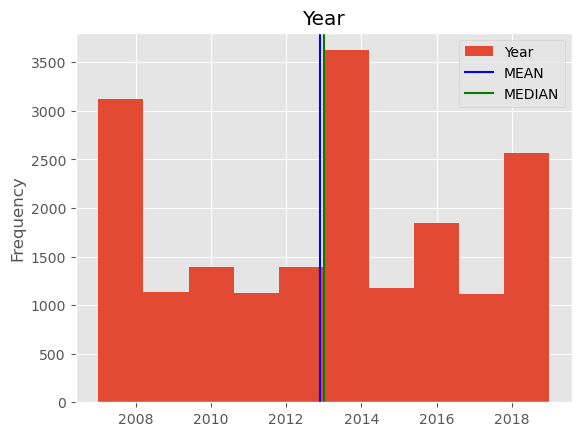

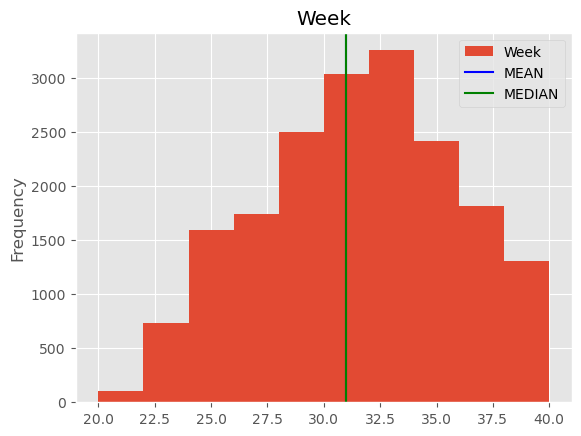

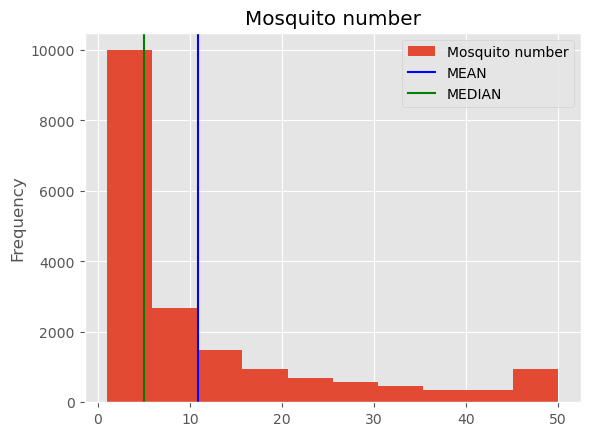

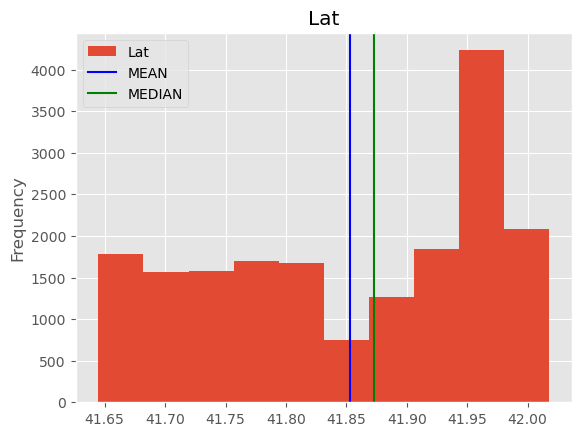

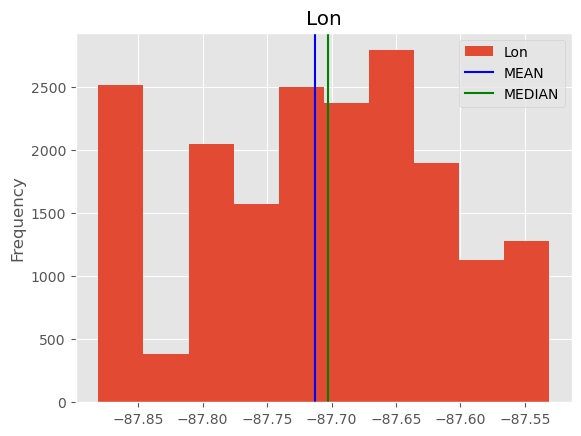

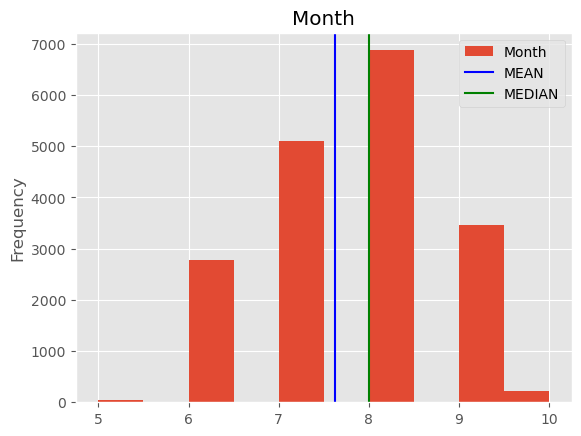

In [90]:
numericalColumns = df.dtypes[df.dtypes.values != 'object'].index.tolist()
#assigning numerical columns to 'numericalColumns' in order to view each numerical column's distrubution

for col in numericalColumns:
    plt.figure()
    df[col].plot(kind='hist')
    plt.title(col)
    plt.axvline(df[col].mean(), c = 'blue', label = "MEAN")
    plt.axvline(df[col].median(), c = 'green', label = "MEDIAN")
    plt.legend()


- Using a for loop to iterate through the numerical columns within the dataframe and get a look at their distribution as well as their the mean and median

<Axes: title={'center': 'Month'}, ylabel='Species'>

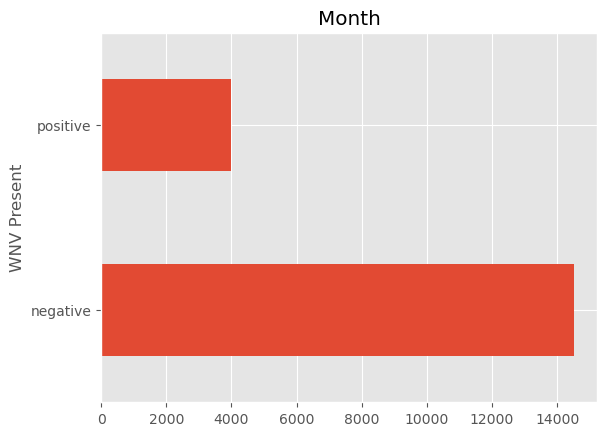

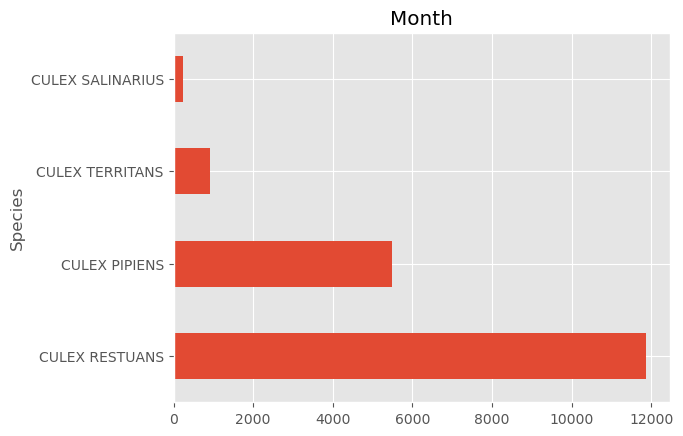

In [91]:
    plt.show
    plt.figure()
    plt.title(col)
    df['WNV Present'].value_counts().plot(kind='barh')

    plt.show
    plt.figure()
    plt.title(col)
    df['Species'].value_counts().plot(kind='barh')

- Plotting 'WNV Present' by counts of positive/negative
    - 14501 instances of West Nile Virus presence 
    - 3994 instances of West Nile Virus not being present 
- Plotting 'Species' by overall counts
    - 11866 instances of Culex Restuans
    - 5486 instances of Culex Pipiens
    - 917 instances of Culex Territans
    - 226 instances of Culex Salinarius

In [92]:
print(df.duplicated().sum())
#summing number of rows that are duplicated

print(df.duplicated().mean() * 100)
#finding the percentage of duplicated rows (3.56%)

658
3.5577183022438494


- Being that 3.56% is a relatively small amount of duplicates, I concluded that there would likely not be a significant change in the overall distrubution of the data if these were dropped

In [93]:
df = df.drop_duplicates()
#droppping duplicates

In [94]:
print(df.duplicated().sum())

0


- Checkpoint ensuring that the duplicate rows have been dropped

In [95]:
df.isna().sum()
#checking for null values

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

- No null values in this data set

**Part 1 Basic Analysis**

**1.1**

In [96]:
df.loc[df['WNV Present'] == 'positive', 'WNV Present'] = 1
df.loc[df['WNV Present'] == 'negative', 'WNV Present'] = 0
#converting 'WNV Present' column to binary

df['WNV Present'] = df['WNV Present'].astype(int)
#ensuring 'WNV Present' is treated as a numeric column

df.head(10)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9
5,2019,39,21XX N CANNON DR,T054C,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.921777,-87.632140,9
6,2019,39,11XX W ROOSEVELT RD,T048,GRAVID,2019-09-26 00:09:00,3,0,CULEX RESTUANS,41.866915,-87.654919,9
7,2019,39,22XX W 51ST ST,T061,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.801048,-87.680425,9
8,2019,39,22XX N CANNON DR,T054A,GRAVID,2019-09-26 00:09:00,1,0,CULEX TERRITANS,41.922737,-87.632450,9
9,2019,39,3XX W 104TH ST,T095,GRAVID,2019-09-26 00:09:00,1,0,CULEX SALINARIUS,41.705328,-87.632955,9


- Converting the WNV Present column into a binary column 

In [97]:
dummies = pd.get_dummies(df['Trap type'])
#creating dummy variables

dummies = dummies.astype(int)
#converting boolean values to 0/1
#wrote this code prior to learning how to set values to integers in class


df = pd.concat([df, dummies], axis=1)
#Concating the dummy variables to the original DataFrame

- Creating dummy variables from the Trap type column
- This allows me to integrate the trap types into the models, improving model performance and interpretability

In [98]:
df.drop(columns=['Trap type'], inplace=True)

- Dropping 'Trap Type' Column

In [99]:
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


- Sanity check ensuring that dummy variables have been added and that the 'Trap type' column has been dropped

**1.2**

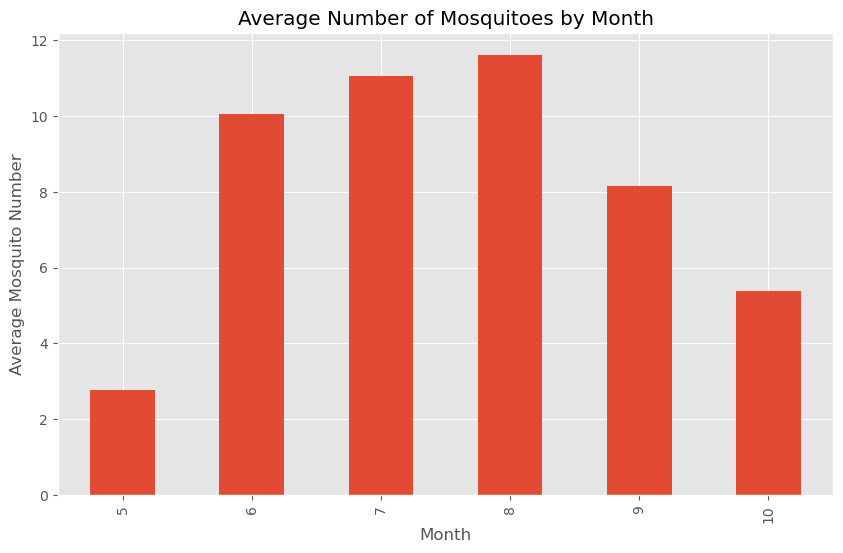

In [100]:
monthlyAvg = df.groupby('Month')['Mosquito number'].mean()
#assigning average number of mosquitos for each month to 'monthlyAvg'

plt.figure(figsize=(10, 6))
monthlyAvg.plot(kind='bar')
plt.title('Average Number of Mosquitoes by Month')
plt.xlabel('Month')
plt.ylabel('Average Mosquito Number')
plt.show()
#plotting average number of mosquitos per month

- Average number of mosquitos by month:
    - May: 2.76
    - June: 10.26
    - July: 11.55
    - August: 12.11
    - September: 8.39
    - October: 5.38

- Trends:
    - There is a sharp increase in mosquito populations from May to August, with a peak in August
    - The population declines starting in September and continues into October potentially due to conditions becoming less favorable for mosquito breeding
    - This pattern aligns with typical mosquito seasonality, where warmer months see higher mosquito activity and cooler months lead to a decrease

In [101]:
df['Mosquito number'].describe()
#Ensuring that the average values per month make sense

count    17837.000000
mean        10.458822
std         13.182843
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: Mosquito number, dtype: float64

**Part 2 - Statistical Analysis**

**2.1**  

In [102]:
"""
Performing chi squared test in order to determine if there is a significant difference between the different mosquito species when 
looking at the occurance of the West Nile Virus
""" 

contingencyTable = pd.crosstab(df['Species'], df['WNV Present'])

chi2, p, dof, expected = stats.chi2_contingency(contingencyTable)

print(f"Chi2: {chi2}\nP-Value: {p}\nDOF: {dof}\nExpected:{expected}")


Chi2: 288.313097009138
P-Value: 3.3649395840995687e-62
DOF: 3
Expected:[[4317.69978135  993.30021865]
 [9257.3239334  2129.6760666 ]
 [ 180.48001346   41.51998654]
 [ 745.49627179  171.50372821]]


- Hypothesis Testing
    - Null Hypothesis: There is no significant difference in the occurrence of West Nile Virus across different mosquito species.
    - Alternative Hypothesis: There is a significant difference in the occurrence of West Nile Virus across different mosquito species.
- The probability value is 3.93e-67, which means that we can reject the null hypothesis
- In conclusion, there is a significant difference in the occurrence of West Nile Virus across different mosquito species

In [103]:
wnv_counts = df.groupby(['Species', 'WNV Present']).size().unstack()
#creating wnv_counts to count the instances of negative and positive instances of WNV for each species
print(wnv_counts)

WNV Present          0     1
Species                     
CULEX PIPIENS     4074  1237
CULEX RESTUANS    9309  2078
CULEX SALINARIUS   215     7
CULEX TERRITANS    903    14


- Taking at the look the instances of WNV presence in each species
    - Culex Pipiens: 25.7% positive cases
    - Culex Restuans: 21.5% positive cases
    - Culex Salinarius: 4.9% positive cases
    - Culex Territans: 1.5% positive cases

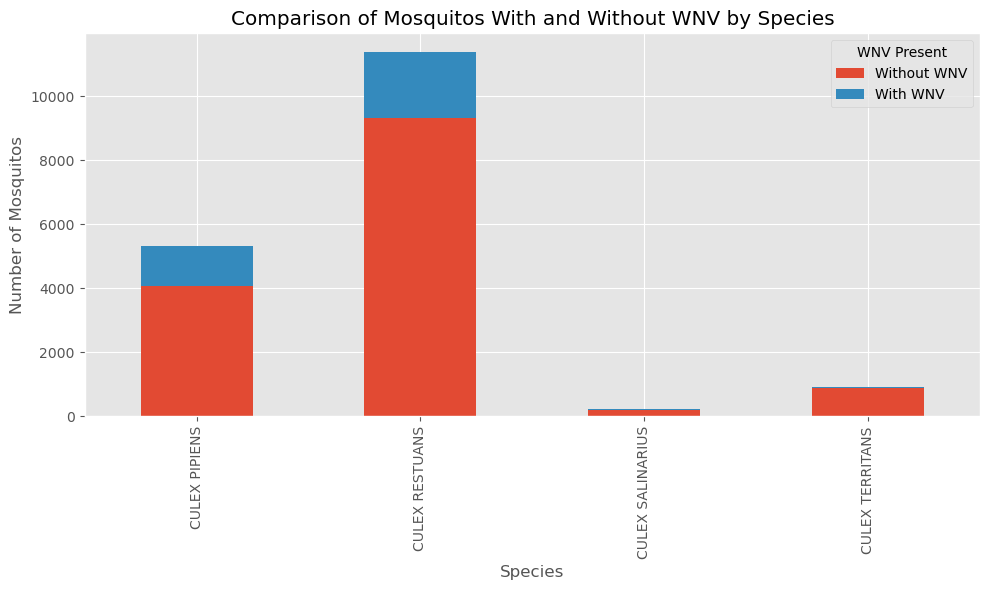

In [104]:
wnv_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Comparison of Mosquitos With and Without WNV by Species')
plt.xlabel('Species')
plt.ylabel('Number of Mosquitos')
plt.legend(title='WNV Present', labels=['Without WNV', 'With WNV'])
#Plotting comparison of mosquitos with and without WNV by species

plt.tight_layout()
plt.show()

- Plotting comparison of mosquitos with and without WNV by species using a stacked bar chart in order to get a better understanding of the difference between the different mosquito species when looking at the occurrence of West Nile Virus
- As mentioned previously, Culex Restuans has the highest percentage of WNV Presence at 25.7%, followed by Culex Pipiens at 21.5%
- Instances of WNV presence among Culex Salinarius and Culex Territans are both very low at less than 5%

**2.2**

In [105]:
dfNum = df.select_dtypes(include=['number'])
#creating new data frame in order to single out numeric columns

dfNum.corr()
#using 'corr' function to display the correlation matrix

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
Year,1.000000,-0.022322,0.119070,0.137174,0.079225,-0.069592,-0.101332,-0.260390,0.150806,-0.011732,0.132026
Week,-0.022322,1.000000,-0.033293,0.176831,-0.007587,0.011429,0.949814,0.028467,-0.047458,-0.013649,0.043962
Mosquito number,0.119070,-0.033293,1.000000,0.389764,0.075713,-0.116071,-0.040942,0.099810,-0.147676,-0.005373,0.116512
WNV Present,0.137174,0.176831,0.389764,1.000000,0.055272,-0.067129,0.163938,0.005986,-0.036641,-0.003591,0.058669
Lat,0.079225,-0.007587,0.075713,0.055272,1.000000,-0.738303,-0.015313,-0.062280,0.060599,0.001559,-0.014152
Lon,-0.069592,0.011429,-0.116071,-0.067129,-0.738303,1.000000,0.017991,0.055521,-0.075455,-0.004677,0.052536
Month,-0.101332,0.949814,-0.040942,0.163938,-0.015313,0.017991,1.000000,0.069957,-0.078674,-0.012062,0.036255
CDC,-0.260390,0.028467,0.099810,0.005986,-0.062280,0.055521,0.069957,1.000000,-0.840920,-0.001309,-0.019036
GRAVID,0.150806,-0.047458,-0.147676,-0.036641,0.060599,-0.075455,-0.078674,-0.840920,1.000000,-0.036017,-0.523748
OVI,-0.011732,-0.013649,-0.005373,-0.003591,0.001559,-0.004677,-0.012062,-0.001309,-0.036017,1.000000,-0.000815


- Positively correlated columns
    - Year (.129), SENTINEL (0.108), Lat (.096), CDC (0.094)
- Negatively correlated columns
    - Lon (-0.15), GRAVID (-0.14), Month (-0.04), Week (-0.034), OVI (-0.01)

In [106]:
rest_columns = dfNum.drop(columns=['Mosquito number']).columns
#removing 'Number of Mosquitos' from the other variables for pairwise comparison

results = {}
#creating dictionary to store the results

for col in rest_columns:
    corr, p_value = stats.pearsonr(dfNum['Mosquito number'], dfNum[col])
    results[col] = {'Correlation': corr, 'P-Value': p_value}
#looping through each column and calculating the correlation and p-value

resultsdf = pd.DataFrame(results).T
#converting the results to a data frame for easier viewing

print(resultsdf)
#display the results

             Correlation       P-Value
Year            0.119070  2.504440e-57
Week           -0.033293  8.692210e-06
WNV Present     0.389764  0.000000e+00
Lat             0.075713  4.248694e-24
Lon            -0.116071  1.508806e-54
Month          -0.040942  4.503860e-08
CDC             0.099810  9.998573e-41
GRAVID         -0.147676  1.629489e-87
OVI            -0.005373  4.730625e-01
SENTINEL        0.116512  5.944500e-55


- In order to explore the correlations between 'Mosquito number' and the other columns, I used the 'pearsonr' function
- I then used a for loop to iterate through each column in the data frame and calculate the correlation and p-value

**Part 3 - Advanced Statistical Analysis**

**3.1**

Beginning the process of creating a linear regression model to determine how the independent variables affect the number of mosquitoes caught

In [107]:
df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,0,1,0,0


***1st Iteration***

In [108]:
X = df[['Year', 'Month', 'Lat', 'Lon', 'SENTINEL', 'GRAVID']]
y = df['Mosquito number']
#Adding independent variables to X, and 'Mosquito number' to Y

xConst = sm.add_constant(X)
#Adding constant to X


- After reviewing the correlations between mosquito number and the rest of the variables, I have decided to begin the process by using 'Year', 'Month', 'Lat', 'Lon', 'SENTINEL', 'GRAVID'
- CDC is highly correlated with GRAVID (-.84), therefore I will only use GRAVID as it is correlated higher with 'Mosquito number'
- Also avoiding 'Week' due to its high correlation with 'Month', and 'Month' is correlated slightly higher with 'Mosquito number'
- Left out OVI as it has a very week correlation (-.01)

In [109]:
corr_df = X.corr()

print(corr_df)
#checking correlations within the independent variables 

              Year     Month       Lat       Lon  SENTINEL    GRAVID
Year      1.000000 -0.101332  0.079225 -0.069592  0.132026  0.150806
Month    -0.101332  1.000000 -0.015313  0.017991  0.036255 -0.078674
Lat       0.079225 -0.015313  1.000000 -0.738303 -0.014152  0.060599
Lon      -0.069592  0.017991 -0.738303  1.000000  0.052536 -0.075455
SENTINEL  0.132026  0.036255 -0.014152  0.052536  1.000000 -0.523748
GRAVID    0.150806 -0.078674  0.060599 -0.075455 -0.523748  1.000000


- 'Lat' and 'Lon' are highly correlated, however I will use these variables (in at least the first iteration) in the model because they provide essential geographic information that might be relevant to the mosquito count
- SENTINEL and GRAVID have a moderate negative correlation (-0.524), I will keep these unless I observe multicollinearity issues when fitting the model

In [110]:
xConst.head(5)
#checkpoint to ensure constant has been added to X

,const,Year,Month,Lat,Lon,SENTINEL,GRAVID
0,1.0,2019,9,41.977738,-87.880969,0,1
1,1.0,2019,9,41.798211,-87.736925,0,1
2,1.0,2019,9,41.987245,-87.689417,0,1
3,1.0,2019,9,41.953664,-87.724987,0,1
4,1.0,2019,9,41.657069,-87.546049,0,1


In [111]:
mylinreg = linear_model.OLS(y, xConst).fit()
mylinreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.58e-229
Time:                        21:06:52   Log-Likelihood:                -70770.
No. Observations:               17837   AIC:                         1.416e+05
Df Residuals:                   17830   BIC:                         1.416e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2545.4166    115.054    -22.124      0.000   -2770.934   -2319.899
Year           0.4609      0.027     17.080      0.000       0.408       0.514
Month         -0.5190      0.096     -5.414      0.000      -0.707      -0.331
Lat           -3.3666      1.239     -2.717      0.007      -5.795      -0.938
Lon          -20.3360      1.550    -13.123      0.000     -23.373     -17.298
SENTINEL       2.3264      1.081      2.152      0.031       0.208       4.445
GRAVID       -11.2091      0.586    -19.144      0.000     -12.357     -10.061
==============================================================================
Omnibus:                     4861.826   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10479.034
Skew:                           1.612   Prob(JB):                         0.00
Kurtosis:                       4.926   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Extremeley low r squared value at .059, which is to be expected per the deliverable guidelines
- The p-values for all the independent variables are very low, meaning they are statistically significant
- High condition number at 2.42e+06, which might indicate multicollinearity issues
- Coefficients
    - Year: For every one-year increase, the mosquito count increases by approximately 0.46
    - Month: For each increase in the month the number of mosquitoes decreases by 0.519
    - Lat: For each one-unit increase in latitude, the mosquito count decreases by about 3.37 mosquitoes
    - Lon: A one-unit increase in longitude is associated with a significant 20.34 decrease in mosquito count
    - SENTINEL: For each one-unit increase in the SENTINEL variable, the mosquito count increases by about 2.33
    - GRAVID: For each one-unit increase in the GRAVID variable, the mosquito count decreases by about 11.21

***2nd Iteration***

In [112]:
X2 = df[['Year', 'SENTINEL', 'Lon', 'CDC', 'Month']]
y = df['Mosquito number']

xConst2 = sm.add_constant(X2)

mylinreg2 = linear_model.OLS(y, xConst2).fit()
mylinreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     221.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.56e-229
Time:                        21:06:52   Log-Likelihood:                -70773.
No. Observations:               17837   AIC:                         1.416e+05
Df Residuals:                   17831   BIC:                         1.416e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2422.0351    103.783    -23.338      0.000   -2625.459   -2218.611
Year           0.4589      0.027     17.012      0.000       0.406       0.512
SENTINEL      13.4591      0.901     14.938      0.000      11.693      15.225
Lon          -17.2421      1.048    -16.448      0.000     -19.297     -15.187
CDC           11.2832      0.586     19.256      0.000      10.135      12.432
Month         -0.5205      0.096     -5.429      0.000      -0.708      -0.333
==============================================================================
Omnibus:                     4854.265   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10446.795
Skew:                           1.610   Prob(JB):                         0.00
Kurtosis:                       4.920   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Creating a second model without 'Lon' to see if the model is more ***accurate***
- Lower condition number at 2.18e+06
- P-values are all 0, indicating the model is statistically significant even though the R-squared value is low

***3rd Iteration***

In [113]:
X3 = df[['Year', 'SENTINEL', 'Lon', 'Lat', 'Month']]
y = df['Mosquito number']

xConst3 = sm.add_constant(X3)

mylinreg3 = linear_model.OLS(y, xConst3).fit()
mylinreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          3.34e-152
Time:                        21:06:53   Log-Likelihood:                -70952.
No. Observations:               17837   AIC:                         1.419e+05
Df Residuals:                   17831   BIC:                         1.420e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2250.6447    115.182    -19.540      0.000   -2476.412   -2024.877
Year           0.3312      0.026     12.551      0.000       0.279       0.383
SENTINEL      13.7460      0.910     15.097      0.000      11.961      15.531
Lon          -20.0734      1.565    -12.823      0.000     -23.142     -17.005
Lat           -3.8940      1.251     -3.112      0.002      -6.347      -1.441
Month         -0.4388      0.097     -4.535      0.000      -0.628      -0.249
==============================================================================
Omnibus:                     5248.265   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12031.666
Skew:                           1.704   Prob(JB):                         0.00
Kurtosis:                       5.140   Cond. No.                     2.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Creating a third model without 'CDC' to see if there is a lower conditional number indiciated less multicollinearity issues
- Same condition number at 2.34e+06
- Significantly lower r-squared at .039
- P-values are still very small, indicating the model is statistically significant even though the R-squared value is low
- The lower r squared indicates that the model explains less of the variance in the number of mosquitoes caught, therefore I do not think this is a better option than the previous models

In [114]:
dfdummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
#creating dummy variables

df = pd.concat([df, dfdummies], axis=1)
#adding them back to the original dataframe

df.drop(columns=['Month'], inplace=True)
#droping the original 'Month' column

df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,Month_6,Month_7,Month_8,Month_9,Month_10
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,0,1,0,0,False,False,False,True,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0,False,False,False,True,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0,False,False,False,True,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0,False,False,False,True,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0,False,False,False,True,False


- Creating dummy variables for 'Month' in order to see if the model benefits from capturing seasonal trends

In [115]:
df.rename(columns={'Month_6': 'June', 'Month_7': 'July', 'Month_8': 'August', 'Month_9': 'September', 'Month_10': 'October'}, inplace=True)
#renaming the dummy variables for better readability
df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,June,July,August,September,October
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,0,1,0,0,False,False,False,True,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0,False,False,False,True,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0,False,False,False,True,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0,False,False,False,True,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0,False,False,False,True,False


In [116]:
months = ['June', 'July', 'August', 'September', 'October']
#assinging month names to 'months' in order to loop through columns

for col in months:
    if col in df.columns:
        df[col] = df[col].astype(int)
#looping through the dummy columns and converting 'True'/'False' to 1/0

df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,June,July,August,September,October
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,0,1,0,0,0,0,0,1,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,0,1,0,0,0,0,0,1,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,0,1,0,0,0,0,0,1,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,0,1,0,0,0,0,0,1,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,0,1,0,0,0,0,0,1,0


- Forgot to assign integer type to the dummy variables
- Now making it so that 'True' values equal 1 and 'False' values equal 0

***4th Iteration***

In [117]:
X4 = df[['Year', 'SENTINEL', 'Lon', 'CDC', 'June', 'July', 'August', 'September', 'October']]
y = df['Mosquito number']

xConst4 = sm.add_constant(X4)

mylinreg4 = linear_model.OLS(y, xConst4).fit()
mylinreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.57e-264
Time:                        21:06:54   Log-Likelihood:                -70681.
No. Observations:               17837   AIC:                         1.414e+05
Df Residuals:                   17827   BIC:                         1.415e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2437.6371    103.434    -23.567      0.000   -2640.377   -2234.897
Year           0.4591      0.027     16.991      0.000       0.406       0.512
SENTINEL      13.2823      0.897     14.812      0.000      11.525      15.040
Lon          -17.3052      1.043    -16.590      0.000     -19.350     -15.261
CDC           11.1935      0.583     19.188      0.000      10.050      12.337
June           5.2650      1.984      2.653      0.008       1.375       9.155
July           6.4218      1.977      3.249      0.001       2.548      10.296
August         6.8988      1.974      3.495      0.000       3.030      10.768
September      3.4099      1.980      1.722      0.085      -0.471       7.291
October        1.8726      2.140      0.875      0.382      -2.322       6.067
==============================================================================
Omnibus:                     4790.625   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10225.050
Skew:                           1.593   Prob(JB):                         0.00
Kurtosis:                       4.899   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adding new dummy variables to model
    - Decided to add these variables to the indendent variables of the second model as it seems to be the best version so far
- Adding dummy variables seems to have improved the model
    - Highest R-squared value so far (.068)
    - Lower conditional number (2.19e+06) in comparison to the past models
    - Still low p-values for the most part
    - Seems as though the model has benefited from including seasonal trends

In [118]:
dfNum = df.select_dtypes(include=['number'])
#creating new data frame in order to single out numeric columns

dfNum.corr()

,Year,Week,Mosquito number,WNV Present,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,June,July,August,September,October
Year,1.000000,-0.022322,0.119070,0.137174,0.079225,-0.069592,-0.260390,0.150806,-0.011732,0.132026,0.096585,0.016919,-0.039534,-0.020116,-0.113735
Week,-0.022322,1.000000,-0.033293,0.176831,-0.007587,0.011429,0.028467,-0.047458,-0.013649,0.043962,-0.663738,-0.352970,0.262574,0.647197,0.212501
Mosquito number,0.119070,-0.033293,1.000000,0.389764,0.075713,-0.116071,0.099810,-0.147676,-0.005373,0.116512,-0.013615,0.027816,0.066001,-0.084362,-0.043566
WNV Present,0.137174,0.176831,0.389764,1.000000,0.055272,-0.067129,0.005986,-0.036641,-0.003591,0.058669,-0.196696,-0.088947,0.264780,-0.026509,-0.045195
Lat,0.079225,-0.007587,0.075713,0.055272,1.000000,-0.738303,-0.062280,0.060599,0.001559,-0.014152,0.015564,0.008616,-0.020726,0.009715,-0.025145
Lon,-0.069592,0.011429,-0.116071,-0.067129,-0.738303,1.000000,0.055521,-0.075455,-0.004677,0.052536,-0.016311,-0.009282,0.015963,-0.000689,0.018514
CDC,-0.260390,0.028467,0.099810,0.005986,-0.062280,0.055521,1.000000,-0.840920,-0.001309,-0.019036,-0.052965,-0.035352,0.044485,0.015952,0.057232
GRAVID,0.150806,-0.047458,-0.147676,-0.036641,0.060599,-0.075455,-0.840920,1.000000,-0.036017,-0.523748,0.064172,0.033793,-0.047397,-0.025980,-0.042041
OVI,-0.011732,-0.013649,-0.005373,-0.003591,0.001559,-0.004677,-0.001309,-0.036017,1.000000,-0.000815,0.017482,-0.004619,-0.005679,-0.003617,-0.000846
SENTINEL,0.132026,0.043962,0.116512,0.058669,-0.014152,0.052536,-0.019036,-0.523748,-0.000815,1.000000,-0.036561,-0.006532,0.018042,0.023217,-0.012307


- Reviewing the correlations between the new dummy variables
- None seem to be high enough to cause legitimate concern

In [119]:
df_species_dummies = pd.get_dummies(df['Species'], prefix='Species')

# Concatenate the original DataFrame with the new dummy variables
df = pd.concat([df, df_species_dummies], axis=1)

# Drop the original 'Species' column if no longer needed
df.drop(columns=['Species'], inplace=True)

# Display the updated DataFrame
df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,CDC,...,SENTINEL,June,July,August,September,October,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,0,...,0,0,0,0,1,0,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,0,...,0,0,0,0,1,0,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,0,...,0,0,0,0,1,0,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,0,...,0,0,0,0,1,0,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,0,...,0,0,0,0,1,0,False,True,False,False


- Creating dummy variables for each species to see if the model could benefit from this

In [120]:
species = ['Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']
#assinging month names to 'months' in order to loop through columns

for col in species:
    if col in df.columns:
        df[col] = df[col].astype(int)
#looping through the dummy columns and converting 'True'/'False' to 1/0

df.head(5)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,CDC,...,SENTINEL,June,July,August,September,October,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,0,...,0,0,0,0,1,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,0,...,0,0,0,0,1,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,0,...,0,0,0,0,1,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,0,...,0,0,0,0,1,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,0,...,0,0,0,0,1,0,0,1,0,0


- Setting 'True'/'False' to 1/0 for the species dummy variables

***5th Iteration***

In [121]:
X5 = df[['Year', 'SENTINEL', 'Lon', 'CDC', 'June', 'July', 'August', 'September', 'October', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
y = df['Mosquito number']

xConst5 = sm.add_constant(X5)

mylinreg5 = linear_model.OLS(y, xConst5).fit()
mylinreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:                -70442.
No. Observations:               17837   AIC:                         1.409e+05
Df Residuals:                   17824   BIC:                         1.410e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1906.8565     82.944    -22.990      0.000   -2069.435   -1744.278
Year                         0.4876      0.028     17.338      0.000       0.432       0.543
SENTINEL                    12.9842      0.885     14.663      0.000      11.249      14.720
Lon                        -15.9907      1.032    -15.493      0.000     -18.014     -13.968
CDC                         10.9223      0.577     18.929      0.000       9.791      12.053
June                         5.6242      1.959      2.871      0.004       1.785       9.463
July                         6.7039      1.952      3.435      0.001       2.878      10.529
August                       6.9519      1.952      3.562      0.000       3.126      10.778
September                    3.5535      1.958      1.815      0.070      -0.285       7.392
October                      1.8119      2.118      0.856      0.392      -2.339       5.963
Species_CULEX PIPIENS     -471.8438     20.725    -22.766      0.000    -512.468    -431.220
Species_CULEX RESTUANS    -472.8915     20.765    -22.774      0.000    -513.592    -432.191
Species_CULEX SALINARIUS  -481.4072     20.741    -23.210      0.000    -522.062    -440.752
Species_CULEX TERRITANS   -480.7141     20.729    -23.190      0.000    -521.346    -440.082
==============================================================================
Omnibus:                     4707.778   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9954.969
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                       4.882   Cond. No.                     1.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

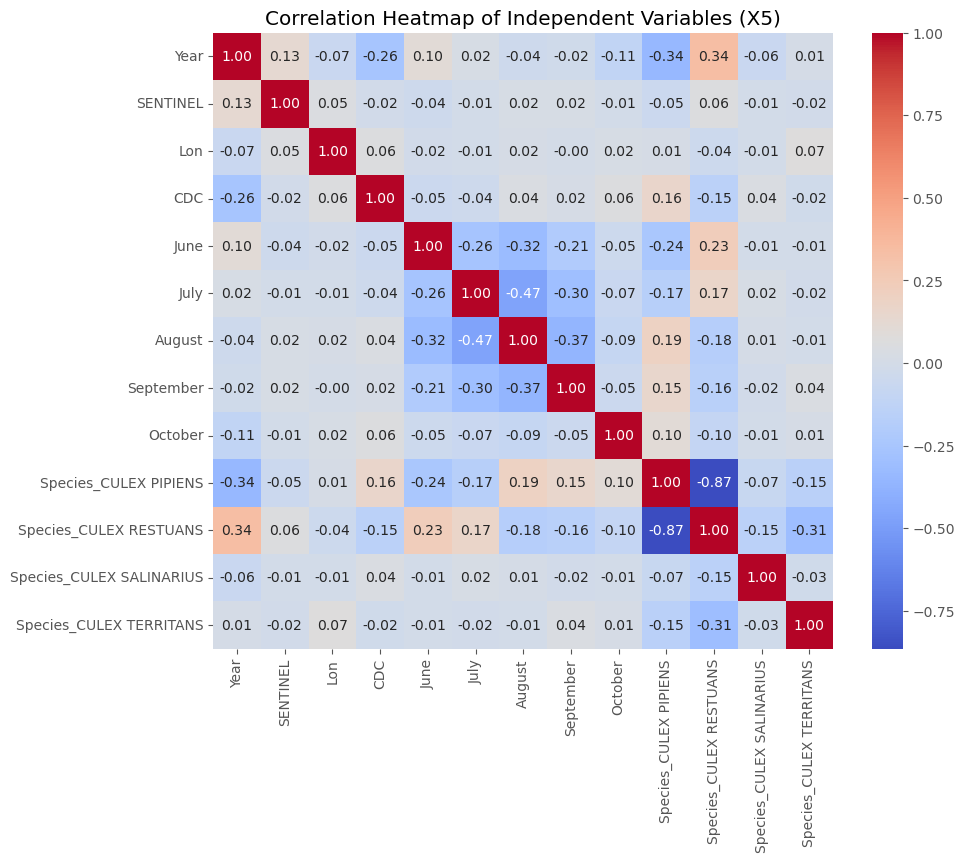

In [122]:
plt.figure(figsize=(10, 8))
sns.heatmap(X5.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Independent Variables (X5)")
plt.show()

- Plotting correlation matrix between independent variables to check their multicollinearity once again now that dummy variables for species have been created

- The fifth version of the model seems to be stronger than the previous iterations (with the highest R-squared value so far at 0.093)
    - Adding the dummy variables has improved its performance
    - The model also has the lowest condition number (1.35e+06) compared to earlier models, indicating less multicollinearity, and it continues to maintain low p-values for most predictors, showing strong statistical significance
- However, after reviewing the relationship between Culex Restuans and Culex Pipiens, they have a very high correlation (-0.865181)
    - Culex Pipiens will bew removed as it has a slightly less signficant relationship with WNV presence (0.076625/-0.015464)

***6th Iteration***

In [123]:
X6 = df[['Year', 'SENTINEL', 'Lon', 'CDC', 'June', 'July', 'August', 'September', 'October', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
y = df['Mosquito number']

xConst6 = sm.add_constant(X6)

mylinreg6 = linear_model.OLS(y, xConst6).fit()
mylinreg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     151.7
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:                -70442.
No. Observations:               17837   AIC:                         1.409e+05
Df Residuals:                   17824   BIC:                         1.410e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2378.7003    103.668    -22.945      0.000   -2581.900   -2175.501
Year                         0.4876      0.028     17.338      0.000       0.432       0.543
SENTINEL                    12.9842      0.885     14.663      0.000      11.249      14.720
Lon                        -15.9907      1.032    -15.493      0.000     -18.014     -13.968
CDC                         10.9223      0.577     18.929      0.000       9.791      12.053
June                         5.6242      1.959      2.871      0.004       1.785       9.463
July                         6.7039      1.952      3.435      0.001       2.878      10.529
August                       6.9519      1.952      3.562      0.000       3.126      10.778
September                    3.5535      1.958      1.815      0.070      -0.285       7.392
October                      1.8119      2.118      0.856      0.392      -2.339       5.963
Species_CULEX RESTUANS      -1.0477      0.238     -4.396      0.000      -1.515      -0.581
Species_CULEX SALINARIUS    -9.5635      0.863    -11.082      0.000     -11.255      -7.872
Species_CULEX TERRITANS     -8.8703      0.457    -19.427      0.000      -9.765      -7.975
==============================================================================
Omnibus:                     4707.778   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9954.969
Skew:                           1.569   Prob(JB):                         0.00
Kurtosis:                       4.882   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

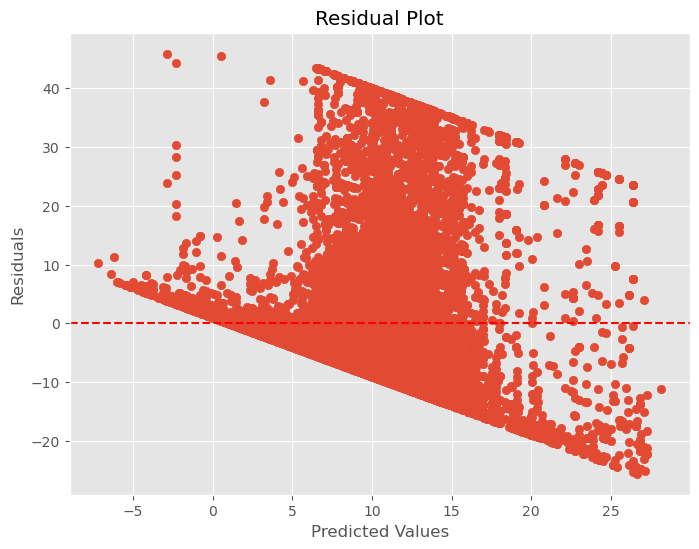

In [124]:
y_pred = mylinreg6.predict(xConst6)
#getting the predictions from the model

residuals = mylinreg6.resid
#getting the residuals

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
#plotting

- The sixth and final version of the model seems to be the strongest yet
    - Same R-squared value as the previous model at 0.093
    - This model has a higher condition number (2.22e+06) compared to earlier models, indicating higher multicollinearity, but it continues to maintain low p-values for most predictors, showing strong statistical significance
      - There is a noticeable "funnel" shape in the residuals, which suggests heteroscedasticity
      - I still feel as though this model represents the most optimized version given the current data, even if some assumptions (like homoscedasticity) are violated
- I believe that these weaknesses are outweighed by the model's improved interpretability and the robustness of its predictors, as well as the fact that none of the indendent variables have significant correlations between each other (< 0.5)


**3.2**

Beginning the process of creating a logistic regression model to determine how the independent variables affect West Nile Virus presence

In [125]:
dfNum = df.select_dtypes(include=['number'])
#creating new data frame in order to single out numeric columns

dfNum.corr()
#using 'corr' function to display the correlation matrix

,Year,Week,Mosquito number,WNV Present,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,June,July,August,September,October,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
Year,1.000000,-0.022322,0.119070,0.137174,0.079225,-0.069592,-0.260390,0.150806,-0.011732,0.132026,0.096585,0.016919,-0.039534,-0.020116,-0.113735,-0.344756,0.339013,-0.064984,0.008907
Week,-0.022322,1.000000,-0.033293,0.176831,-0.007587,0.011429,0.028467,-0.047458,-0.013649,0.043962,-0.663738,-0.352970,0.262574,0.647197,0.212501,0.317479,-0.317208,-0.011016,0.038288
Mosquito number,0.119070,-0.033293,1.000000,0.389764,0.075713,-0.116071,0.099810,-0.147676,-0.005373,0.116512,-0.013615,0.027816,0.066001,-0.084362,-0.043566,0.019626,0.066797,-0.071959,-0.149844
WNV Present,0.137174,0.176831,0.389764,1.000000,0.055272,-0.067129,0.005986,-0.036641,-0.003591,0.058669,-0.196696,-0.088947,0.264780,-0.026509,-0.045195,0.076625,-0.015464,-0.044767,-0.102545
Lat,0.079225,-0.007587,0.075713,0.055272,1.000000,-0.738303,-0.062280,0.060599,0.001559,-0.014152,0.015564,0.008616,-0.020726,0.009715,-0.025145,-0.049304,0.071086,-0.003188,-0.050970
Lon,-0.069592,0.011429,-0.116071,-0.067129,-0.738303,1.000000,0.055521,-0.075455,-0.004677,0.052536,-0.016311,-0.009282,0.015963,-0.000689,0.018514,0.014686,-0.044212,-0.007240,0.069417
CDC,-0.260390,0.028467,0.099810,0.005986,-0.062280,0.055521,1.000000,-0.840920,-0.001309,-0.019036,-0.052965,-0.035352,0.044485,0.015952,0.057232,0.155741,-0.146997,0.039992,-0.022741
GRAVID,0.150806,-0.047458,-0.147676,-0.036641,0.060599,-0.075455,-0.840920,1.000000,-0.036017,-0.523748,0.064172,0.033793,-0.047397,-0.025980,-0.042041,-0.105795,0.094135,-0.029949,0.029290
OVI,-0.011732,-0.013649,-0.005373,-0.003591,0.001559,-0.004677,-0.001309,-0.036017,1.000000,-0.000815,0.017482,-0.004619,-0.005679,-0.003617,-0.000846,0.011499,-0.009949,-0.000841,-0.001743
SENTINEL,0.132026,0.043962,0.116512,0.058669,-0.014152,0.052536,-0.019036,-0.523748,-0.000815,1.000000,-0.036561,-0.006532,0.018042,0.023217,-0.012307,-0.050393,0.058094,-0.007525,-0.018271


- Reviewing the correlations within the dataframe once again to view correlations with 'WNV Present'

***1st Iteration***

In [126]:
Xlog = df[['Year', 'Week', 'Mosquito number', 'Lat', 'Lon', 'CDC', 'GRAVID', 'OVI', 'SENTINEL', 'June', 'July', 'August', 'September', 'October', 'Species_CULEX PIPIENS', 'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
ylog = df['WNV Present']
#defining X and y

XconstLog = sm.add_constant(Xlog)
#adding constant

mylogreg = sm.Logit(ylog,XconstLog)
mylogregResults = mylogreg.fit()
#fitting the model

mylogregResults.summary()
#looking at summary

         Current function value: 0.346593
         Iterations: 35


/Users/mychalortiz/Downloads/Brainstation/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17818
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.2808
Time:                        21:06:56   Log-Likelihood:                -6182.2
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -238.4721    3.2e+06  -7.45e-05      1.000   -6.27e+06    6.27e+06
Year                         0.1171      0.008     15.415      0.000       0.102       0.132
Week                         0.1093      0.017      6.253      0.000       0.075       0.144
Mosquito number              0.0691      0.002     41.572      0.000       0.066       0.072
Lat                          0.1322      0.305      0.434      0.665      -0.465       0.730
Lon                         -0.7750      0.376     -2.060      0.039      -1.512      -0.038
CDC                        -48.5282   3.11e+06  -1.56e-05      1.000   -6.09e+06    6.09e+06
GRAVID                     -48.1312    3.1e+06  -1.55e-05      1.000   -6.08e+06    6.08e+06
OVI                        -93.1099   1.94e+11   -4.8e-10      1.000    -3.8e+11     3.8e+11
SENTINEL                   -48.7029   3.11e+06  -1.57e-05      1.000   -6.09e+06    6.09e+06
June                        27.2124        nan        nan        nan         nan         nan
July                        30.0864        nan        nan        nan         nan         nan
August                      31.1232        nan        nan        nan         nan         nan
September                   29.8608        nan        nan        nan         nan         nan
October                     28.4240        nan        nan        nan         nan         nan
Species_CULEX PIPIENS      -58.6840        nan        nan        nan         nan         nan
Species_CULEX RESTUANS     -58.8208        nan        nan        nan         nan         nan
Species_CULEX SALINARIUS   -59.9927        nan        nan        nan         nan         nan
Species_CULEX TERRITANS    -60.9747        nan        nan        nan         nan         nan
============================================================================================
"""

- Beginning with a model that contains all possible independent variables
- Interprting Coefficients
    - Year: For each additional year, the odds of WNV presence increase by approximately 0.1171, which suggests that WNV presence is more likely in later years
    - Week: For each one-week increase, the odds of WNV presence increase by 0.1093, indicating a slightly higher likelihood of WNV presence later in the season
    - Mosquito number: For each additional mosquito, the odds of WNV presence increase by 0.0691, meaning that a higher mosquito count is associated with a greater likelihood of WNV presence
    - Lat (Latitude): For each one-unit increase in latitude, the odds of WNV presence increase by 0.1322
        - This result is not statistically significant though as it has a high p-value (0.665)
    - Lon (Longitude): For each one-unit increase in longitude, the odds of WNV presence decrease by 0.7750
        - Statistically significant, as the p-value is 0.039
    - Trap types: Each have a p-value of 1.000 which means that they are not statistically significant in predicting WNV presence
    - June: The coefficient is 27.2124, but without standard errors or p-values, their significance is unknown at the moment (unsure as to why this is the case)
    - July, August, September, October: These months show positive coefficients, meaning that the odds of WNV presence increase during these months
        - Like June, however, the missing p-values prevent us from knowing their statistical significance
    - CULEX PIPIENS, CULEX RESTUANS, CULEX SALINARIUS, CULEX TERRITANS: Each have very high negative coefficients, but without p-values, their significance is unkown

In [127]:
model_predictions_prob = mylogregResults.predict(XconstLog)

model_predictions_binary = np.where(model_predictions_prob > 0.5, 1, 0)
#Convering probabilities to binary (0 or 1) based on a threshold (0.5)

accuracy = np.mean(model_predictions_binary == ylog)
# Measure accuracy by comparing the binary predictions to the actual values

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8381


- Predicting outcomes, converting them to binary (0 or 1), and calculating accuracy by comparing predictions to actual values
- Model accuracy of 83.81%

In [128]:
Xlog.corr()
#viewing correlation matrix between independent variables

,Year,Week,Mosquito number,Lat,Lon,CDC,GRAVID,OVI,SENTINEL,June,July,August,September,October,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
Year,1.000000,-0.022322,0.119070,0.079225,-0.069592,-0.260390,0.150806,-0.011732,0.132026,0.096585,0.016919,-0.039534,-0.020116,-0.113735,-0.344756,0.339013,-0.064984,0.008907
Week,-0.022322,1.000000,-0.033293,-0.007587,0.011429,0.028467,-0.047458,-0.013649,0.043962,-0.663738,-0.352970,0.262574,0.647197,0.212501,0.317479,-0.317208,-0.011016,0.038288
Mosquito number,0.119070,-0.033293,1.000000,0.075713,-0.116071,0.099810,-0.147676,-0.005373,0.116512,-0.013615,0.027816,0.066001,-0.084362,-0.043566,0.019626,0.066797,-0.071959,-0.149844
Lat,0.079225,-0.007587,0.075713,1.000000,-0.738303,-0.062280,0.060599,0.001559,-0.014152,0.015564,0.008616,-0.020726,0.009715,-0.025145,-0.049304,0.071086,-0.003188,-0.050970
Lon,-0.069592,0.011429,-0.116071,-0.738303,1.000000,0.055521,-0.075455,-0.004677,0.052536,-0.016311,-0.009282,0.015963,-0.000689,0.018514,0.014686,-0.044212,-0.007240,0.069417
CDC,-0.260390,0.028467,0.099810,-0.062280,0.055521,1.000000,-0.840920,-0.001309,-0.019036,-0.052965,-0.035352,0.044485,0.015952,0.057232,0.155741,-0.146997,0.039992,-0.022741
GRAVID,0.150806,-0.047458,-0.147676,0.060599,-0.075455,-0.840920,1.000000,-0.036017,-0.523748,0.064172,0.033793,-0.047397,-0.025980,-0.042041,-0.105795,0.094135,-0.029949,0.029290
OVI,-0.011732,-0.013649,-0.005373,0.001559,-0.004677,-0.001309,-0.036017,1.000000,-0.000815,0.017482,-0.004619,-0.005679,-0.003617,-0.000846,0.011499,-0.009949,-0.000841,-0.001743
SENTINEL,0.132026,0.043962,0.116512,-0.014152,0.052536,-0.019036,-0.523748,-0.000815,1.000000,-0.036561,-0.006532,0.018042,0.023217,-0.012307,-0.050393,0.058094,-0.007525,-0.018271
June,0.096585,-0.663738,-0.013615,0.015564,-0.016311,-0.052965,0.064172,0.017482,-0.036561,1.000000,-0.264192,-0.324867,-0.206912,-0.048412,-0.239262,0.234340,-0.008961,-0.009925


- Culex Restuans and Culex Salinarius are also highly correlated, therefore I will be removing Culex Restuans in the second iteration as it is slightly less correlated (-0.015464/-0.044767)
- Lat and Lon are also highly correlated, therefore I will be removing Lat in the second iteration as it is slightly less correlated (0.055272/-0.067129)
- June and Week are also highly correlated, although I will not be removing these to preserve the integrity of the seasonality patterns, as their inclusion is essential for capturing temporal variations that may impact West Nile Virus presence
- Removing all trap type dummy variables as their high p-value (1.000) suggests that they are not statistically significant in the model

***2nd Iteration***

In [129]:
Xlog2 = df[['Year', 'Week', 'Mosquito number', 'Lon', 'June', 'July', 'August', 'September', 'October', 'Species_CULEX PIPIENS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
ylog = df['WNV Present']
#defining X and y

XconstLog2 = sm.add_constant(Xlog2)
#adding constant

mylogreg2 = sm.Logit(ylog,XconstLog2)
mylogregResults2 = mylogreg2.fit()
#fitting the model

mylogregResults2.summary()
#looking at summary

         Current function value: 0.347080
         Iterations: 35


/Users/mychalortiz/Downloads/Brainstation/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17824
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.2797
Time:                        21:06:56   Log-Likelihood:                -6190.9
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -343.7900     33.775    -10.179      0.000    -409.987    -277.593
Year                         0.1191      0.007     16.258      0.000       0.105       0.133
Week                         0.1111      0.017      6.382      0.000       0.077       0.145
Mosquito number              0.0676      0.002     42.103      0.000       0.064       0.071
Lon                         -1.0509      0.247     -4.254      0.000      -1.535      -0.567
June                         2.8611     22.255      0.129      0.898     -40.757      46.479
July                         5.7080     22.254      0.256      0.798     -37.909      49.325
August                       6.7207     22.254      0.302      0.763     -36.897      50.338
September                    5.4431     22.255      0.245      0.807     -38.176      49.062
October                      3.9863     22.259      0.179      0.858     -39.641      47.613
Species_CULEX PIPIENS        0.1331      0.056      2.389      0.017       0.024       0.242
Species_CULEX SALINARIUS    -1.2113      0.405     -2.988      0.003      -2.006      -0.417
Species_CULEX TERRITANS     -2.1490      0.275     -7.826      0.000      -2.687      -1.611
============================================================================================
"""

In [130]:
model_predictions_prob2 = mylogregResults2.predict(XconstLog2)

model_predictions_binary = np.where(model_predictions_prob2 > 0.5, 1, 0)
#Convering probabilities to binary (0 or 1) based on a threshold (0.5)

accuracy = np.mean(model_predictions_binary == ylog)
# Measure accuracy by comparing the binary predictions to the actual values

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8386


- Predicting outcomes, converting them to binary (0 or 1), and calculating accuracy by comparing predictions to actual values
- Model accuracy of 83.86%

***3rd Iteration***

In [131]:
Xlog3 = df[['Year', 'Week', 'Mosquito number', 'Lon', 'Species_CULEX PIPIENS', 'Species_CULEX SALINARIUS', 'Species_CULEX TERRITANS']]
ylog = df['WNV Present']
#defining X and y

XconstLog3 = sm.add_constant(Xlog3)
#adding constant

mylogreg3 = sm.Logit(ylog,XconstLog3)
mylogregResults3 = mylogreg3.fit()
#fitting the model

mylogregResults3.summary()
#looking at summary

Optimization terminated successfully.
         Current function value: 0.382057
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17829
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.2072
Time:                        21:06:57   Log-Likelihood:                -6814.8
converged:                       True   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -294.8597     23.998    -12.287      0.000    -341.894    -247.825
Year                         0.1120      0.007     16.225      0.000       0.098       0.125
Week                         0.1485      0.006     25.038      0.000       0.137       0.160
Mosquito number              0.0647      0.001     43.869      0.000       0.062       0.068
Lon                         -0.7109      0.233     -3.052      0.002      -1.167      -0.254
Species_CULEX PIPIENS        0.2957      0.054      5.473      0.000       0.190       0.402
Species_CULEX SALINARIUS    -1.0129      0.397     -2.550      0.011      -1.792      -0.234
Species_CULEX TERRITANS     -2.1020      0.273     -7.690      0.000      -2.638      -1.566
============================================================================================
"""

- The second iteration of the model has a slightly higher psuedo r-squared value
    - (0.2072/0.2797)
    - Does not seem significant enough to warrant concern
  - Model 1 has a slightly higher log-likelihood, suggesting a marginally better fit compared to Model 2
      -(6182.2/-6190.9)
- In the second model more variables are statistically significant (other than the 'Month' dummy variables), including Lon, Species_CULEX PIPIENS, Species_CULEX SALINARIUS, and Species_CULEX TERRITANS
    - This indicates that Model 2 has more meaningful predictors for WNV presence

- The first two models have a slighlty higher psuedo r-squared which suggests that the first two models have better overall fit to the data
    - However, the pseudo R-squared is not the only determinant of a good model
- The log-likelihood for Model 3 is lower, indicating that it fits the data worse than the first two models
- Convergance
    - The first two models both failed to converge
    - The third modeled converged successfully, which indicates that it is generally more reliable than one that doesn’t, even if the metrics aren't quite as good (strong positive)
- The third model keeps only the key independent variables, removing a lot of the unnecessary/statistically insignificant variables that were present in the first two models
- Coefficients
    - The coefficients in third model seem more reasonable and interpretable
        - For example the species variables had oddly high correlations in the first model (each of which was less than -0.58)

In [132]:
model_predictions_prob3 = mylogregResults3.predict(XconstLog3)

model_predictions_binary = np.where(model_predictions_prob3 > 0.5, 1, 0)
#Convering probabilities to binary (0 or 1) based on a threshold (0.5)

accuracy = np.mean(model_predictions_binary == ylog)
# Measure accuracy by comparing the binary predictions to the actual values

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8286


- Predicting outcomes, converting them to binary (0 or 1), and calculating accuracy by comparing predictions to actual values
- Model accuracy of 82.86%

- Being that both models have similar accuracy (83.86%/82.86%), I have selected the third (mylogregResults3) iteration to be my final model for this analysis, as it provides the best balance between predictive accuracy and interpretability. As well as the fact that ot converged succesfully which indicates that it is generally more reliable than one the first two, even if the metrics aren't quite as good.

***Model Interpretation***

In [133]:
mylogregResults3.params

const                      -294.859724
Year                          0.111953
Week                          0.148476
Mosquito number               0.064683
Lon                          -0.710899
Species_CULEX PIPIENS         0.295702
Species_CULEX SALINARIUS     -1.012936
Species_CULEX TERRITANS      -2.101994
dtype: float64

- Year: Has a coefficient of 0.111953, meaning for each additional year, the log-odds of the target variable (WNV Presence) increase by 0.112.
- Week: Has a coefficient of 0.148476, indicating that as the week number increases, the log-odds of WNV presence also increase by 0.148.
- Mosquito number: A positive effect (0.064683), meaning the higher the mosquito count, the higher the odds of West Nile Virus presence.
- Longitude (Lon): Has a negative effect (-0.710899), suggesting that as longitude increases, the likelihood of WNV presence decreases.
- Species Variables:
    - CULEX PIPIENS: A small positive coefficient (0.295702), suggesting this species increases the odds of WNV presence.
    - CULEX SALINARIUS: A negative coefficient (-1.012936), indicating this species decreases the odds of WNV presence.
    - CULEX TERRITANS: Also has a negative impact (-2.101934) on the likelihood of WNV presence.


**Project Summary**

This project utilized a linear regression model to analyze the factors affecting the number of mosquitoes caught, and logistic regression model to the factos affecting West Nile Virus presence

Linear Regression Model:

Key findings:
- Year: A positive correlation with mosquito numbers, indicating an increasing trend over time.
- Longitude: A negative association, suggesting fewer mosquitoes are caught as we move eastward.
- Mosquito species: Different species had varying impacts on mosquito counts, with some species significantly increasing or decreasing the number caught.
- Residual analysis showed some signs of heteroscedasticity, indicating that the model may not fully capture the variability in mosquito numbers across all cases.
    - After several iterations, however, I believe this model represents the best possible fit given the available data.

Logistic Regression Model:

Key findings:
- The final model achieved an accuracy of 82.86%.
- Year and Week: Both show a positive relationship with WNV presence, suggesting an increasing likelihood over time.
- Mosquito numbers: Higher counts of mosquitoes increase the probability of WNV presence.
- Longitude: A negative effect indicates that WNV presence decreases as we move eastward.
- Species: Culex Pipiens increases the odds of WNV presence, while Culex Salinarius and Culex Territans decrease it.

These models provide valuable insights into the factors influencing the number of mosquitoes caught and West Nile Virus presence.